In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### 1. Economic dataset

The dataset for economic factors is divided into countries and aggregates, which are the reginal or political group of different countries. Here we would like to do an EDA on the countries dataset.

In [2]:
economy = pd.read_csv('./Data/economy/economic_countries/countries.csv')

First we can get the list of differnt indicators in this dataset, remove some columns that are before 2015 and remove the NaNs at the bottom of the table.

In [3]:
economy = pd.concat([economy.iloc[:, :4], economy.iloc[:, -6:]], axis=1).dropna(subset=['Country Code']).replace('..', np.nan)
economy

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Argentina,ARG,Domestic credit provided by financial sector (...,FS.AST.DOMS.GD.ZS,40.4276279370297,37.9322482578709,38.8683983871173,NaN,NaN,NaN
1,Argentina,ARG,GDP (current US$),NY.GDP.MKTP.CD,594749285413.212,557531376217.967,643628665302.155,524819742918.669,451932356085.842,389288056265.325
2,Argentina,ARG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2.73115982828944,-2.08032784377811,2.81850297775918,-2.61739646282038,-2.0259342366392,-9.89526896368687
3,Argentina,ARG,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,12590,12220,13140,12430,11250,9070
4,Argentina,ARG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,19730,19860,23000,22460,22090,20230
...,...,...,...,...,...,...,...,...,...,...
3467,Zimbabwe,ZWE,Tax revenue (% of GDP),GC.TAX.TOTL.GD.ZS,17.6733631953313,15.4583408165803,15.8743745304837,13.6031256253675,NaN,NaN
3468,Zimbabwe,ZWE,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,44.3,NaN,50.3,NaN
3469,Zimbabwe,ZWE,Income share held by highest 20%,SI.DST.05TH.20,NaN,NaN,51.1,NaN,NaN,NaN
3470,Zimbabwe,ZWE,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,16308056425.9346,16956893321.9913,18054677070.8772,20128985709.7455,17695830208.6924,NaN


In [4]:
indicators = pd.DataFrame(economy['Series Name'].unique(), columns=['Indicator Name'])
metadata = pd.read_csv('./Data/economy/economic_countries/countries_metadata.csv')
metadata = metadata[['Code', 'Indicator Name', 'Long definition']]
indicators = indicators.merge(metadata, on='Indicator Name')
indicators

,Indicator Name,Code,Long definition
0,Domestic credit provided by financial sector (...,FS.AST.DOMS.GD.ZS,Domestic credit provided by the financial sect...
1,GDP (current US$),NY.GDP.MKTP.CD,GDP at purchaser's prices is the sum of gross ...
2,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Annual percentage growth rate of GDP at market...
3,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,GNI per capita (formerly GNP per capita) is th...
4,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,This indicator provides per capita values for ...
5,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,GNI (formerly GNP) is the sum of value added b...
6,"GNI, PPP (current international $)",NY.GNP.MKTP.PP.CD,This indicator provides values for gross natio...
7,Income share held by lowest 20%,SI.DST.FRST.20,Percentage share of income or consumption is t...
8,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,Inflation as measured by the annual growth rat...
9,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,Poverty headcount ratio at $1.90 a day is the ...


Now let's have a glance of the data. In the year 2019, what are the distribution of GDP and GNI per capita among countries?

In [5]:
data_2019 = economy[['Country Name', 'Country Code', 'Series Name', 'Series Code', '2019 [YR2019]']]
gdp_2019 = data_2019.loc[data_2019['Series Code'] == 'NY.GDP.MKTP.CD'].dropna(subset=['2019 [YR2019]']).rename(columns={'2019 [YR2019]': 'GDP'})
gdp_2019['GDP'] = gdp_2019['GDP'].astype('float')
gdp_2019['Log_GDP'] = np.log(gdp_2019['GDP'])
gdp_2019

,Country Name,Country Code,Series Name,Series Code,GDP,Log_GDP
1,Argentina,ARG,GDP (current US$),NY.GDP.MKTP.CD,4.519324e+11,26.836798
17,Australia,AUS,GDP (current US$),NY.GDP.MKTP.CD,1.391953e+12,27.961729
33,Brazil,BRA,GDP (current US$),NY.GDP.MKTP.CD,1.877824e+12,28.261135
49,China,CHN,GDP (current US$),NY.GDP.MKTP.CD,1.427994e+13,30.289877
65,France,FRA,GDP (current US$),NY.GDP.MKTP.CD,2.728870e+12,28.634909
...,...,...,...,...,...,...
3377,Vietnam,VNM,GDP (current US$),NY.GDP.MKTP.CD,2.619212e+11,26.291310
3393,Virgin Islands (U.S.),VIR,GDP (current US$),NY.GDP.MKTP.CD,4.068000e+09,22.126417
3409,West Bank and Gaza,PSE,GDP (current US$),NY.GDP.MKTP.CD,1.713350e+10,23.564301
3441,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,2.330867e+10,23.872091


In [6]:
gdp_2019['GDP'].describe()

count    2.050000e+02
mean     4.223380e+11
std      1.881979e+12
min      4.727146e+07
25%      7.220395e+09
50%      2.689666e+10
75%      2.051442e+11
max      2.143322e+13
Name: GDP, dtype: float64

In [7]:
gdp_2019['GDP'].skew()

9.010020453863454

Since the GDP data is extremely skewed, we can use the log of GDP to plot the histgram.

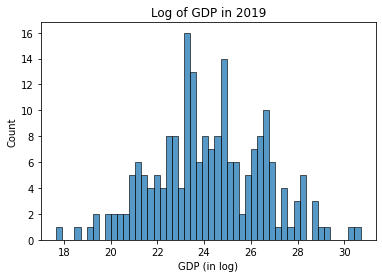

In [8]:
sns.histplot(gdp_2019['Log_GDP'], bins=50)
plt.title('Log of GDP in 2019')
plt.xlabel('GDP (in log)')
plt.show()

In [9]:
gnipc_2019 = data_2019.loc[data_2019['Series Code'] == 'NY.GNP.PCAP.CD'].dropna(subset=['2019 [YR2019]']).rename(columns={'2019 [YR2019]': 'GNIPC'})
gnipc_2019['GNIPC'] = gnipc_2019['GNIPC'].astype('float')
gnipc_2019

,Country Name,Country Code,Series Name,Series Code,GNIPC
3,Argentina,ARG,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,11250.0
19,Australia,AUS,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,54910.0
35,Brazil,BRA,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,9270.0
51,China,CHN,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,10310.0
67,France,FRA,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,42510.0
...,...,...,...,...,...
3347,Vanuatu,VUT,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,3450.0
3379,Vietnam,VNM,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,2570.0
3411,West Bank and Gaza,PSE,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4270.0
3443,Zambia,ZMB,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,1430.0


In [10]:
gnipc_2019['GNIPC'].describe()

count       193.000000
mean      15606.269430
std       21140.047244
min         240.000000
25%        2230.000000
50%        6180.000000
75%       19050.000000
max      117740.000000
Name: GNIPC, dtype: float64

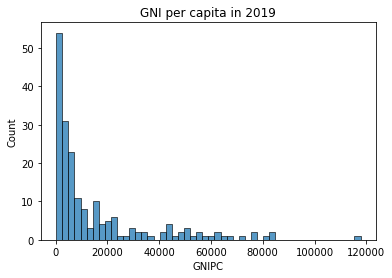

In [11]:
sns.histplot(gnipc_2019['GNIPC'], bins=50)
plt.title('GNI per capita in 2019')
plt.show()

We can find a correlation between these two indicators:

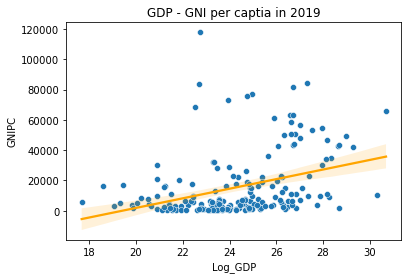

In [12]:
gdp_gnic = gnipc_2019[['Country Name', 'Country Code', 'GNIPC']].merge(gdp_2019[['Country Code', 'GDP', 'Log_GDP']], on='Country Code')
sns.scatterplot(x=gdp_gnic['Log_GDP'], y=gdp_gnic['GNIPC'])
sns.regplot(x=gdp_gnic['Log_GDP'], y=gdp_gnic['GNIPC'], scatter=False, color='orange')
plt.title('GDP - GNI per captia in 2019')
plt.show()

In [13]:
np.corrcoef(x=gdp_gnic['Log_GDP'], y=gdp_gnic['GNIPC'])

array([[1.        , 0.35276353],
       [0.35276353, 1.        ]])

We can also check the change of the indicator through the years. For example, what is the trend for some countries' GDP growth from 2015 to 2020?

In [14]:
gdp_growth = economy.loc[economy['Series Code'] == 'NY.GDP.MKTP.KD.ZG']
country_list = ['USA', 'CHN', 'JPN', 'DEU', 'FRA', 'GBR', 'IND', 'ITA', 'CAN', 'KOR']
gdp_growth = gdp_growth.loc[gdp_growth['Country Code'].isin(country_list)]
gdp_growth.iloc[:, -6:] = gdp_growth.iloc[:, -6:].astype('float')
gdp_growth

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
50,China,CHN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,7.041329,6.848762,6.947201,6.749774,5.949714,2.347514
66,France,FRA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1.112912,1.095464,2.29142,1.865066,1.842972,-7.855256
82,Germany,DEU,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1.491932,2.23,2.680231,1.086025,1.055508,-4.569617
98,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,7.996254,8.256306,6.795383,6.532989,4.041554,-7.251755
130,Italy,ITA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,0.778304,1.293463,1.667859,0.925811,0.410278,-8.938593
146,Japan,JPN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1.560627,0.753827,1.675332,0.558851,0.270305,-4.585508
162,"Korea, Rep.",KOR,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2.809103,2.946882,3.159636,2.907404,2.243978,-0.852031
290,United Kingdom,GBR,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2.622597,2.263464,2.134453,1.650925,1.671944,-9.39616
306,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.075515,1.711427,2.332679,2.996464,2.161177,-3.404592
834,Canada,CAN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,0.659177,1.001394,3.03988,2.777041,1.879592,-5.233024


Text(0.5, 1.0, "Major Countries' GDP Growth trend 2015-2020")

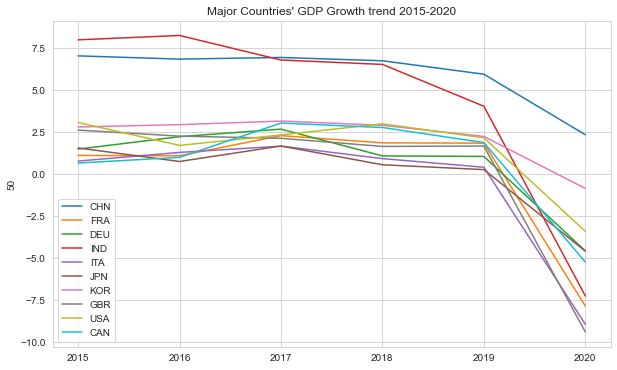

In [15]:
pp = gdp_growth.drop(labels=['Country Name', 'Series Name', 'Series Code'], axis=1)
years = np.arange(2015, 2021)
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
for i in range(10):
    sns.lineplot(x=years, y=pp.iloc[i, 1:], markers=True, label=pp['Country Code'].iloc[i])
plt.title('Major Countries\' GDP Growth trend 2015-2020')

### 2. Population dataset

In [16]:
population = pd.read_csv('./Data/population/pop_worldometer_data.csv')
population

,Country (or dependency),Population (2020),Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share %
0,China,1439323776,0.39,5540090,153.0,9388211.0,-348399.0,1.7,38.0,61.0,18.47
1,India,1380004385,0.99,13586631,464.0,2973190.0,-532687.0,2.2,28.0,35.0,17.70
2,United States,331002651,0.59,1937734,36.0,9147420.0,954806.0,1.8,38.0,83.0,4.25
3,Indonesia,273523615,1.07,2898047,151.0,1811570.0,-98955.0,2.3,30.0,56.0,3.51
4,Pakistan,220892340,2.00,4327022,287.0,770880.0,-233379.0,3.6,23.0,35.0,2.83
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4992,0.06,3,50.0,100.0,NaN,NaN,NaN,10.0,0.00
231,Falkland Islands,3480,3.05,103,0.0,12170.0,NaN,NaN,NaN,66.0,0.00
232,Niue,1626,0.68,11,6.0,260.0,NaN,NaN,NaN,46.0,0.00
233,Tokelau,1357,1.27,17,136.0,10.0,NaN,NaN,NaN,0.0,0.00


In [17]:
population.describe()

,Population (2020),Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share %
count,2.350000e+02,206.000000,2.350000e+02,235.000000,2.350000e+02,201.000000,201.000000,201.000000,222.000000,235.000000
mean,3.316936e+07,1.330146,3.460878e+05,475.770213,5.535918e+05,6.283582,2.693035,30.606965,59.234234,0.425447
std,1.351374e+08,0.930457,1.128260e+06,2331.285935,1.687796e+06,123291.887548,1.264496,9.127965,24.230400,1.733723
min,8.010000e+02,0.000000,-3.838400e+05,0.000000,0.000000e+00,-653249.000000,1.100000,15.000000,0.000000,0.000000
25%,3.988760e+05,0.592500,4.240000e+02,37.000000,2.545000e+03,-10047.000000,1.700000,22.000000,43.000000,0.010000
50%,5.459642e+06,1.140000,3.917000e+04,95.000000,7.724000e+04,-852.000000,2.300000,30.000000,60.500000,0.070000
75%,2.057705e+07,1.957500,2.496600e+05,239.500000,4.038200e+05,9741.000000,3.600000,39.000000,79.000000,0.265000
max,1.439324e+09,3.840000,1.358663e+07,26337.000000,1.637687e+07,954806.000000,7.000000,48.000000,100.000000,18.470000


The distribution of the population is also extremely skewed, so we draw the histogram based on its logarithm.

Text(0.5, 1.0, 'World Population by Country (Log) in 2020')

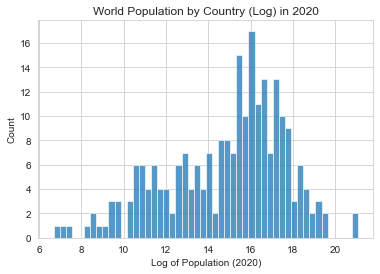

In [18]:
sns.histplot(np.log(population['Population (2020)']), bins=50)
plt.xlabel('Log of Population (2020)')
plt.title('World Population by Country (Log) in 2020')

We can also check the population growth of one country with the dataset:

In [19]:
population_total = pd.read_csv('./Data/population/population_total_long.csv')
pop_swiss = population_total.loc[population_total['Country Name'] == 'Switzerland']
pop_swiss.head(10)

,Country Name,Year,Count
33,Switzerland,1960,5327827
249,Switzerland,1961,5434294
465,Switzerland,1962,5573815
681,Switzerland,1963,5694247
897,Switzerland,1964,5789228
1113,Switzerland,1965,5856472
1329,Switzerland,1966,5918002
1545,Switzerland,1967,5991785
1761,Switzerland,1968,6067714
1977,Switzerland,1969,6136387


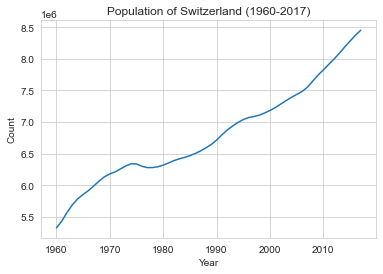

In [20]:
sns.lineplot(data=pop_swiss, x='Year', y='Count')
plt.title('Population of Switzerland (1960-2017)')
plt.show()

### 3. Religion dataset

In [38]:
religion_national = pd.read_csv('./Data/religion/national.csv')
religion_national.head()

,year,state,code,christianity_protestant,christianity_romancatholic,christianity_easternorthodox,christianity_anglican,christianity_other,christianity_all,judaism_orthodox,...,jainism_percent,confucianism_percent,syncretism_percent,animism_percent,noreligion_percent,otherreligion_percent,religion_sumpercent,total_percent,dual_religion,source_code
0,1945,United States of America,USA,66069671,38716742,1121898,2400000,1956807,110265118,821489,...,0.0,0.0,0.0,0.0,0.1635,0.0039,0.9961,1.0000,0,13
1,1950,United States of America,USA,73090083,42635882,3045420,3045420,1177214,122994019,1078078,...,0.0,0.0,0.0,0.0,0.1482,0.0041,0.9959,1.0000,0,18
2,1955,United States of America,USA,79294628,46402368,3454916,2572767,2277091,134001770,944000,...,0.0,0.0,0.0,0.0,0.1404,0.0193,0.9807,0.9999,0,15
3,1960,United States of America,USA,90692928,50587880,3334535,2710065,2908939,150234347,973500,...,0.0,0.0,0.0,0.0,0.1193,0.0076,0.9924,0.9999,0,13
4,1965,United States of America,USA,94165803,64761783,4792868,2822149,973155,167515758,991200,...,0.0,0.0,0.0,0.0,0.1020,0.0030,0.9970,1.0001,0,20


In [39]:
christ_2010 = religion_national.loc[religion_national['year'] == 2010][['state', 'code', 'christianity_all']].rename(columns={'state': 'Country'})
christ_2010

,Country,code,christianity_all
13,United States of America,USA,233111307
27,Canada,CAN,26431104
35,Bahamas,BHM,302657
49,Cuba,CUB,7407107
63,Haiti,HAI,8003882
...,...,...,...
1975,Nauru,NAU,9638
1979,Marshall Islands,MSI,50971
1983,Palau,PAL,18391
1987,Federated States of Micronesia,FSM,96000


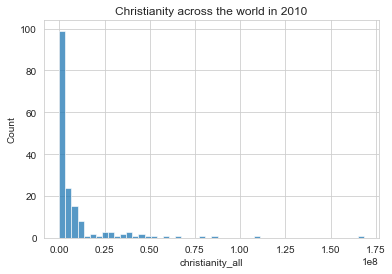

In [65]:
sns.histplot(christ_2010.christianity_all, bins=50)
plt.title('Christianity across the world in 2010')
plt.show()